In [85]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Load the dataset
data = pd.read_csv("Customer_Purchase_Prediction_Dataset.csv")

# Display the first few rows to understand its structure
print("Dataset Loaded:")
data.head()

Dataset Loaded:


,Age,Annual Income,Gender,Education Level,Credit Score,Account Balance,Spending Score,Marital Status,Will Purchase
0,62,19753.900583,Male,PhD,603.334188,20620.591439,23,Single,0
1,65,41908.180499,Female,Master,648.276248,29185.403439,94,Married,1
2,18,45864.941982,Male,Master,653.633895,20042.774630,75,Married,1
3,21,39354.080512,Male,PhD,639.708299,14914.918992,60,Single,0
4,21,76083.090162,Female,PhD,631.122654,10738.286717,57,Married,1


In [87]:
# Checking the shape of the dataset (number of rows and columns)
print("Dataset Shape:", data.shape)

# Display basic information about the dataset, including data types and non-null counts
print("\nDataset Information:")
data.info()

Dataset Shape: (1010, 9)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1010 non-null   int64  
 1   Annual Income    1010 non-null   float64
 2   Gender           1010 non-null   object 
 3   Education Level  1010 non-null   object 
 4   Credit Score     1010 non-null   float64
 5   Account Balance  1010 non-null   float64
 6   Spending Score   1010 non-null   int64  
 7   Marital Status   1010 non-null   object 
 8   Will Purchase    1010 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 71.1+ KB


In [88]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Features:")
print(data.describe())

# Checking the distribution of the target variable 'Will Purchase'
print("\nTarget Variable Distribution (Will Purchase):")
print(data['Will Purchase'].value_counts(normalize=True))


Summary Statistics for Numerical Features:
               Age  Annual Income  Credit Score  Account Balance  \
count  1010.000000    1010.000000   1010.000000      1010.000000   
mean     43.242574   49784.069435    647.417627     19901.774039   
std      15.229840   14634.588525     48.331180      5048.158215   
min      18.000000    4307.854178    509.466597      1299.496810   
25%      30.000000   40092.942117    614.005273     16419.501126   
50%      43.000000   49777.738077    647.028398     19962.167556   
75%      56.000000   59099.206624    679.602178     23415.828675   
max      69.000000   97564.621599    840.083011     37137.692735   

       Spending Score  Will Purchase  
count     1010.000000    1010.000000  
mean        51.209901       0.378218  
std         29.372518       0.485183  
min          1.000000       0.000000  
25%         26.000000       0.000000  
50%         50.000000       0.000000  
75%         77.000000       1.000000  
max        100.000000       1.0

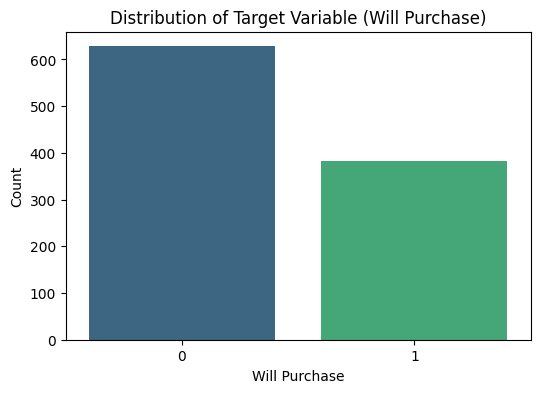

In [89]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Will Purchase', hue='Will Purchase', data=data, palette='viridis', legend=False)
plt.title('Distribution of Target Variable (Will Purchase)')
plt.xlabel('Will Purchase')
plt.ylabel('Count')
plt.show()

<Figure size 1400x1000 with 0 Axes>

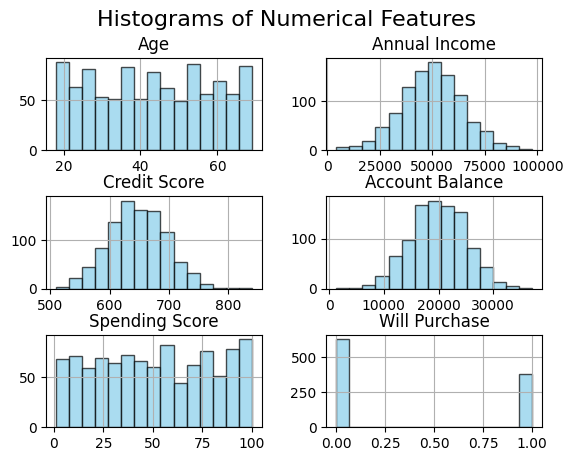

In [90]:
# Histograms for numerical features
plt.figure(figsize=(14, 10))
data.hist(bins=15, edgecolor='black', color='skyblue', alpha=0.7)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between plots
plt.show()

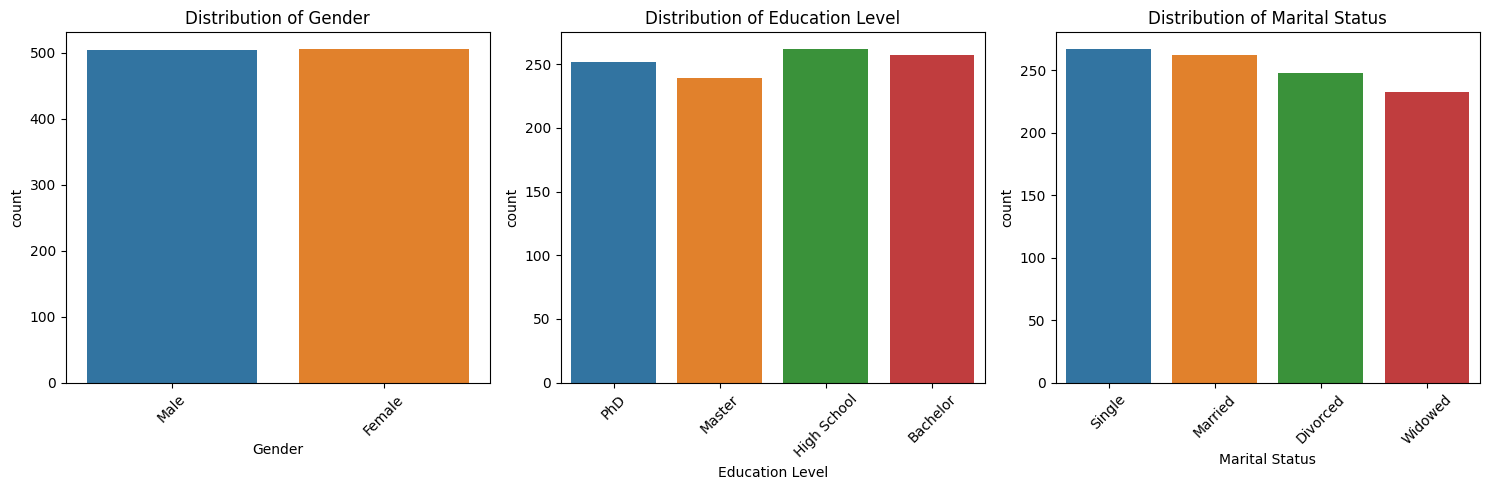

In [91]:
# Count plots for categorical variables
categorical_columns = ['Gender', 'Education Level', 'Marital Status']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(x=col, hue=col, data=data, legend=False)  # Added hue=col, removed palette
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
# Checking the actual column names to verify which categorical columns exist
print("Column Names in Dataset:", data.columns)

# Encoding categorical variables only if they exist in the dataset
categorical_columns = ['Gender', 'Education Level', 'Marital Status']
available_categorical_columns = [col for col in categorical_columns if col in data.columns]

if available_categorical_columns:
    # Encoding available categorical columns using one-hot encoding
    data = pd.get_dummies(data, columns=available_categorical_columns, drop_first=True)
else:
    print("No specified categorical columns found for encoding.")

Column Names in Dataset: Index(['Age', 'Annual Income', 'Gender', 'Education Level', 'Credit Score',
       'Account Balance', 'Spending Score', 'Marital Status', 'Will Purchase'],
      dtype='object')


In [93]:
# Standardizing numerical features for consistency
numerical_cols = ['Age', 'Annual Income', 'Credit Score', 'Account Balance', 'Spending Score']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Separating features and target variable
X = data.drop(columns=['Will Purchase'])
y = data['Will Purchase']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Checking the transformed dataset structure after encoding and scaling
print("\nTransformed Dataset (First Few Rows):")
print(data.head())


Transformed Dataset (First Few Rows):
        Age  Annual Income  Credit Score  Account Balance  Spending Score  \
0  1.232233      -2.053016     -0.912564         0.142463       -0.960894   
1  1.429313      -0.538436      0.017774         1.839924        1.457529   
2 -1.658263      -0.267932      0.128682         0.027945        0.810345   
3 -1.461184      -0.713047     -0.159589        -0.988346        0.299411   
4 -1.461184       1.797936     -0.337319        -1.816113        0.197224   

   Will Purchase  Gender_Male  Education Level_High School  \
0              0         True                        False   
1              1        False                        False   
2              1         True                        False   
3              0         True                        False   
4              1        False                        False   

   Education Level_Master  Education Level_PhD  Marital Status_Married  \
0                   False                 True     

In [94]:
# Applying PCA to reduce dimensions, ensuring at least 7 components are retained
pca = PCA(n_components=7)  # Retaining 7 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Displaying the explained variance ratio of the 7 PCA components
print("Explained Variance Ratio of PCA Components:", pca.explained_variance_ratio_)
print("\nCumulative Explained Variance (7 Components):", np.sum(pca.explained_variance_ratio_))

Explained Variance Ratio of PCA Components: [0.16883772 0.16121801 0.15716391 0.15119277 0.1486493  0.04319161
 0.04255087]

Cumulative Explained Variance (7 Components): 0.8728041843608234


In [95]:
# Defining parameter grid for Random Forest with additional regularization
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

# Initializing Random Forest with Grid Search on PCA-transformed data
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_pca, y_train)
best_rf = grid_search_rf.best_estimator_

# Displaying the best parameters found for Random Forest
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)



Best Random Forest Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


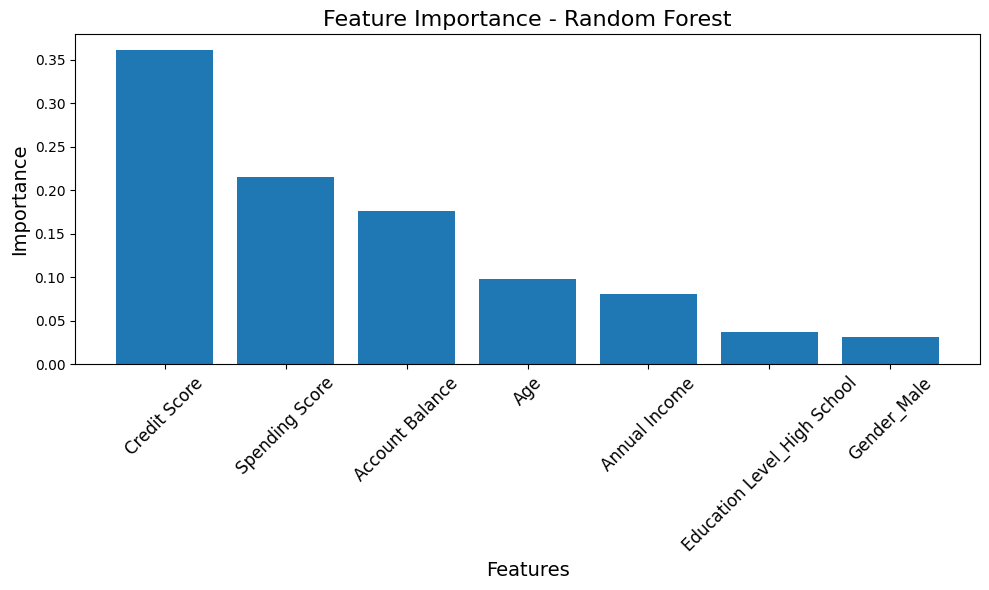

In [114]:
# Plot feature importance for Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest", fontsize=16)
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, fontsize=12)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.tight_layout()
plt.show()

In [96]:
# Defining parameter grid for Logistic Regression with regularization
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initializing Logistic Regression with Grid Search on PCA-transformed data
log_reg = LogisticRegression(random_state=42, max_iter=1000)
grid_search_log_reg = GridSearchCV(log_reg, param_grid=param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train_pca, y_train)
best_log_reg = grid_search_log_reg.best_estimator_

# Displaying the best parameters found for Logistic Regression
print("\nBest Logistic Regression Parameters:", grid_search_log_reg.best_params_)



Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [97]:
# Performing cross-validation for Random Forest to confirm generalization
rf_cv_scores = cross_val_score(best_rf, X_train_pca, y_train, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Accuracy:", rf_cv_scores.mean())

# Performing cross-validation for Logistic Regression to confirm generalization
log_reg_cv_scores = cross_val_score(best_log_reg, X_train_pca, y_train, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Accuracy:", log_reg_cv_scores.mean())



Random Forest Cross-Validation Accuracy: 0.9115109794353433

Logistic Regression Cross-Validation Accuracy: 0.8771348902056465



Random Forest with PCA (7 Components) Performance:
Accuracy: 0.93
Precision: 0.94
Recall: 0.86
F1 Score: 0.90
AUC-ROC: 0.97


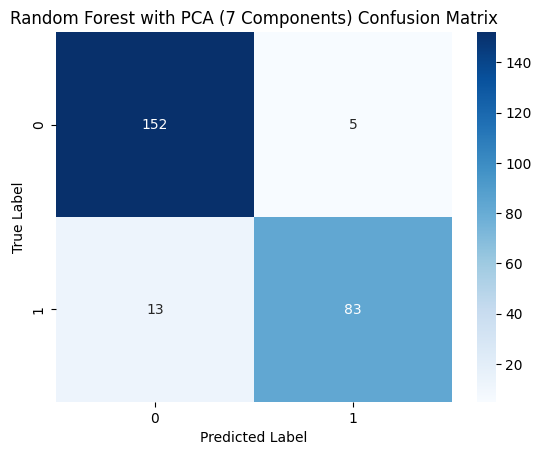

In [118]:
# Defining a function to evaluate model performance and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Evaluating the Random Forest model with PCA-transformed data (7 components)
evaluate_model(best_rf, X_test_pca, y_test, "Random Forest with PCA (7 Components)")


Logistic Regression with PCA (7 Components) Performance:
Accuracy: 0.88
Precision: 0.87
Recall: 0.80
F1 Score: 0.83
AUC-ROC: 0.95


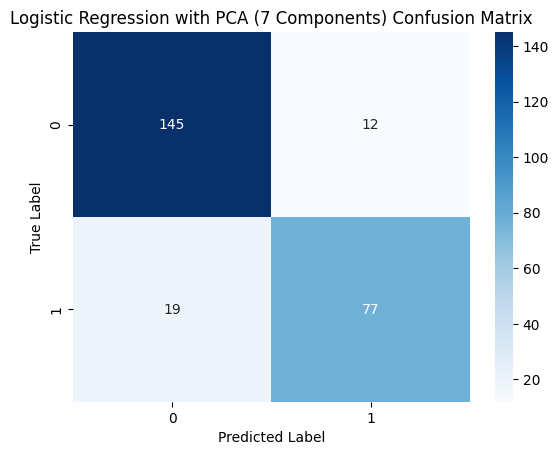

In [120]:
# Evaluating the Logistic Regression model with PCA-transformed data (7 components)
evaluate_model(best_log_reg, X_test_pca, y_test, "Logistic Regression with PCA (7 Components)")

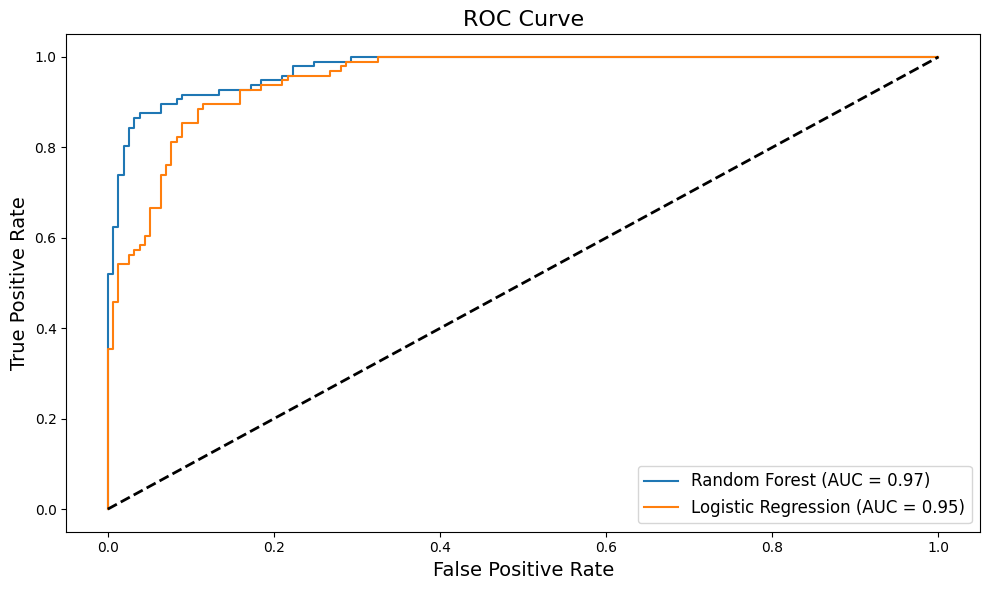

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC Curve for both models
plt.figure(figsize=(10, 6))
for model, name in zip([best_rf, best_log_reg], ["Random Forest", "Logistic Regression"]):
    y_pred_prob = model.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)  # Diagonal line
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [126]:
# Comparative table of metrics
import pandas as pd

metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "Random Forest": [
        0.93,
        0.94,
        0.86,
        0.90,
        0.97
    ],
    "Logistic Regression": [
        0.88,
        0.87,
        0.80,
        0.83,
        0.95
    ]
}

metrics_df = pd.DataFrame(metrics_data)
display(metrics_df)

,Metric,Random Forest,Logistic Regression
0,Accuracy,0.93,0.88
1,Precision,0.94,0.87
2,Recall,0.86,0.80
3,F1-Score,0.90,0.83
4,AUC-ROC,0.97,0.95
